In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets, metrics, tree
import matplotlib.image as img
from sklearn.model_selection import train_test_split

1.0


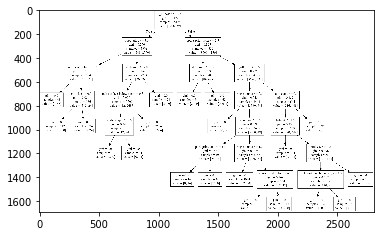

In [5]:
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

shrooms = pd.read_csv("agaricus-lepiota.data", names=columns)
for feature in columns:
  shrooms[feature] = pd.Categorical(shrooms[feature]).codes
shroom_train, shroom_test = train_test_split(shrooms, test_size=0.3333)

train_shrooms_y = shroom_train["target"]
train_shrooms_x = shroom_train.drop("target", axis=1).dropna()
test_shrooms_y = shroom_test["target"]
test_shrooms_x = shroom_test.drop("target", axis=1).dropna()
t = tree.DecisionTreeClassifier()
t = t.fit(train_shrooms_x, train_shrooms_y)
print(t.score(test_shrooms_x, test_shrooms_y))
with open("grzyby.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=columns[1:])

dtree = img.imread('graphviz.png')
imgplot = plt.imshow(dtree)


0.9704861111111112
[[121   0   3   0]
 [  0  17   0   3]
 [  8   1 396   0]
 [  2   0   0  25]]


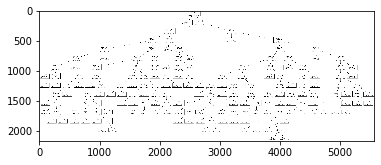

In [6]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot',
                                      'safety', 'target']

cars = pd.read_csv('car.data', names=names)
for feature in names:
    cars[feature] = pd.Categorical(cars[feature]).codes
cars.head()
car_train, car_test = train_test_split(cars, test_size=0.3333)

train_cars_y = car_train["target"]
train_cars_x = car_train.drop("target", axis=1).dropna()
test_cars_y = car_test["target"]
test_cars_x = car_test.drop("target", axis=1).dropna()
t = tree.DecisionTreeClassifier()
t = t.fit(train_cars_x, train_cars_y)
print(t.score(test_cars_x, test_cars_y))
print(metrics.confusion_matrix(test_cars_y, t.predict(test_cars_x)))
with open("cars.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=names[:-1])


dtree = img.imread('cars.png')
imgplot = plt.imshow(dtree)